# Lab Meeting Review 11/8

In [1]:
from utils import (
    BaseForecaster, 
    ResidualForecaster,
    TimeSeriesPreprocessor,
    crps,
    HistoricalForecaster
)
from plotting_utils import (
    get_validation_series,
    plot_forecasts,
    plot_crps_seq,
    plot_crps_strip,
    plot_crps_bysite,
    plot_rmse_strip,
    plot_score_improvement_bysite,
    plot_sitewide_comparison,
    count_score_improvement_bysite,
)
import os
import time
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
targets = pd.read_csv("targets.csv.gz")

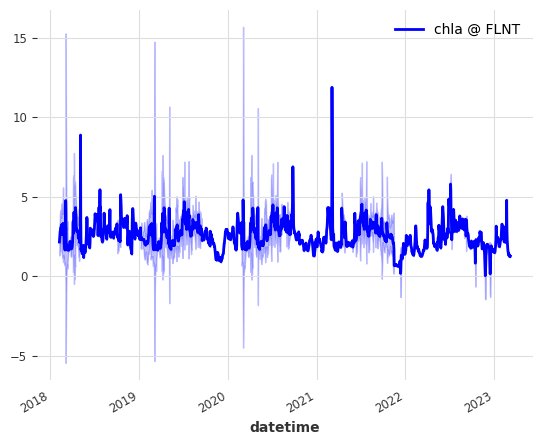

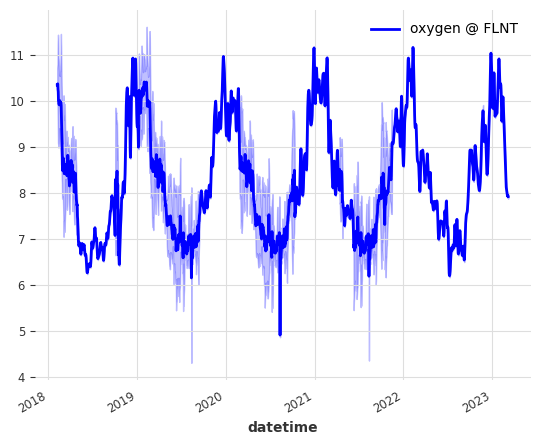

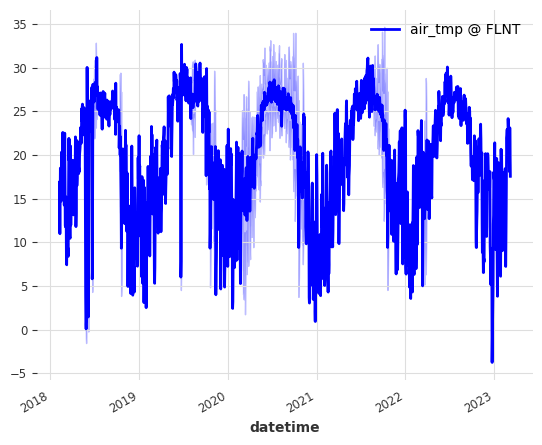

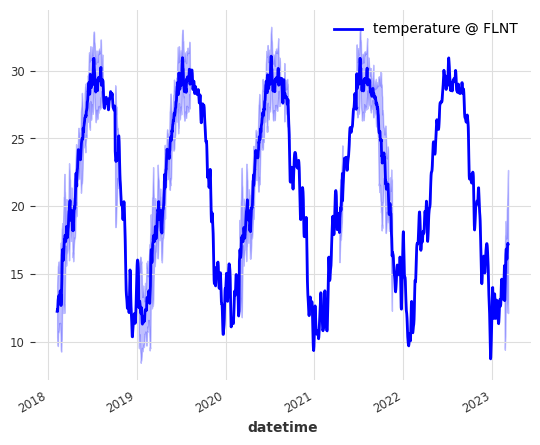

In [22]:
data_preprocessor = TimeSeriesPreprocessor()
site = "FLNT"
data_preprocessor.load(site)
data_preprocessor.plot_by_site(site)

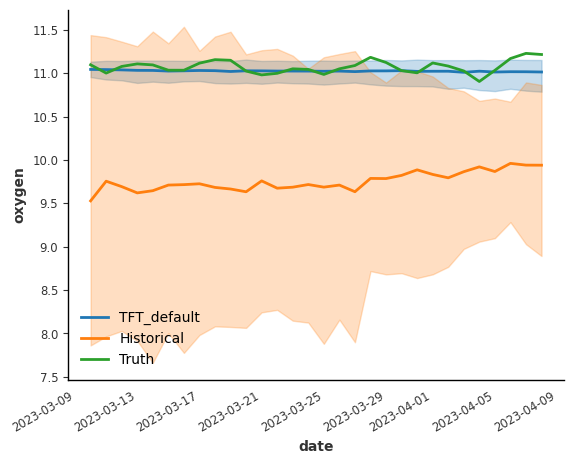

In [12]:
models = ["TFT_default"]
args = [models, targets, "COMO", "oxygen"]
plot_forecasts(*args)

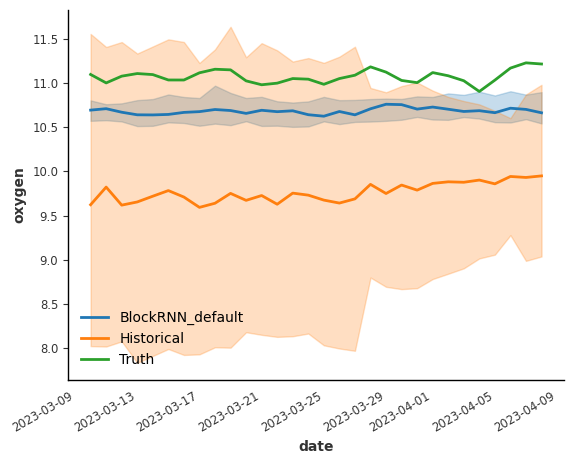

In [13]:
models = ["BlockRNN_default"]
args = [models, targets, "COMO", "oxygen"]
plot_forecasts(*args)

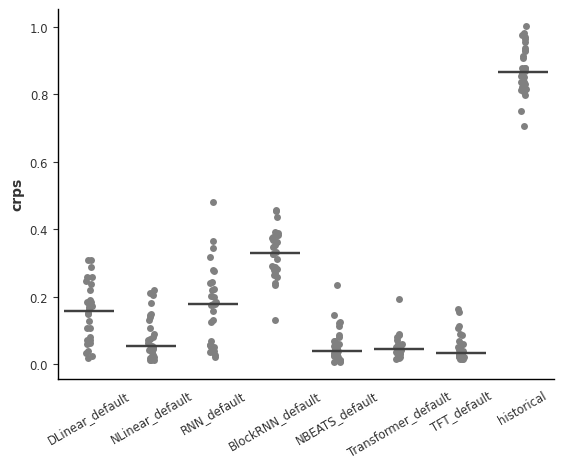

In [14]:
models = ["DLinear_default", "NLinear_default", "RNN_default"] + ["BlockRNN_default", "NBEATS_default", "Transformer_default", "TFT_default"]
args = [models, targets, "COMO", "oxygen"]
plot_crps_strip(*args)

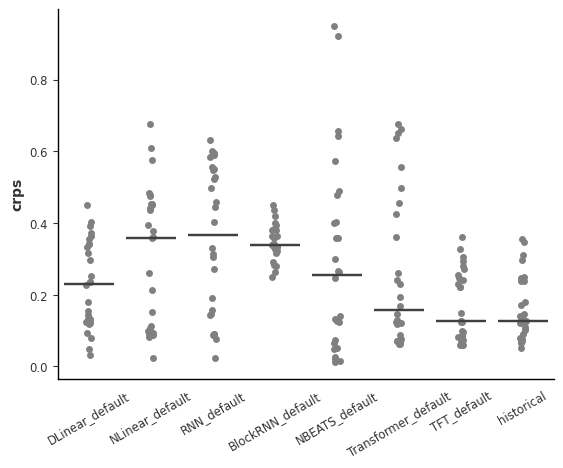

In [23]:
models = ["DLinear_default", "NLinear_default", "RNN_default"] + ["BlockRNN_default", "NBEATS_default", "Transformer_default", "TFT_default"]
args = [models, targets, "BARC", "oxygen"]
plot_crps_strip(*args)

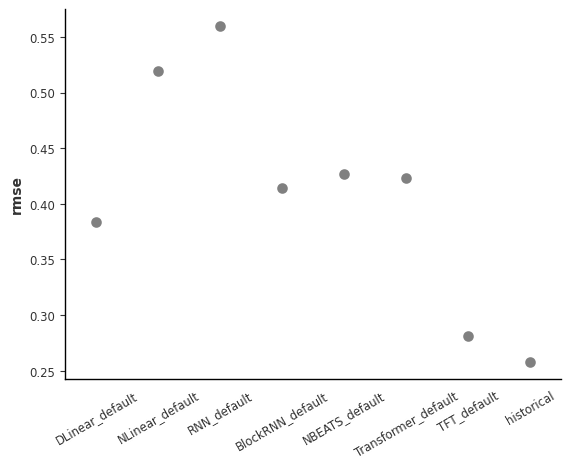

In [24]:
plot_rmse_strip(*args)

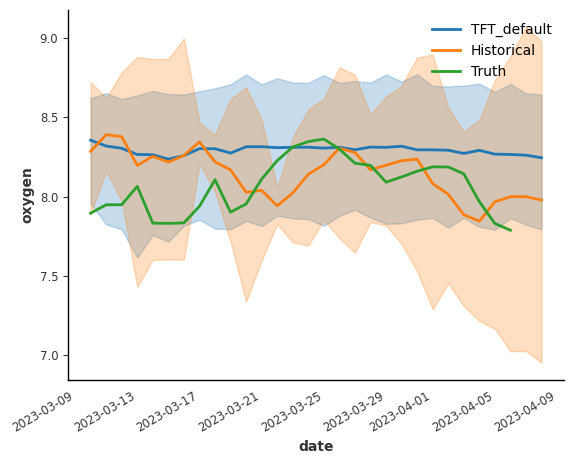

In [17]:
models = ["TFT_default"]
args = [models, targets, "BARC", "oxygen"]
plot_forecasts(*args)

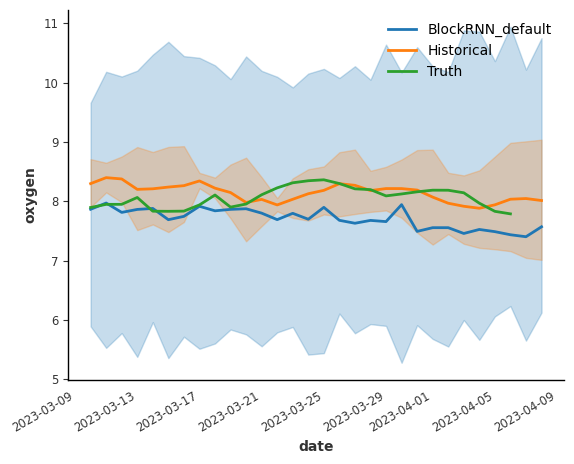

In [19]:
models = ["BlockRNN_default"]
args = [models, targets, "BARC", "oxygen"]
plot_forecasts(*args)

ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.


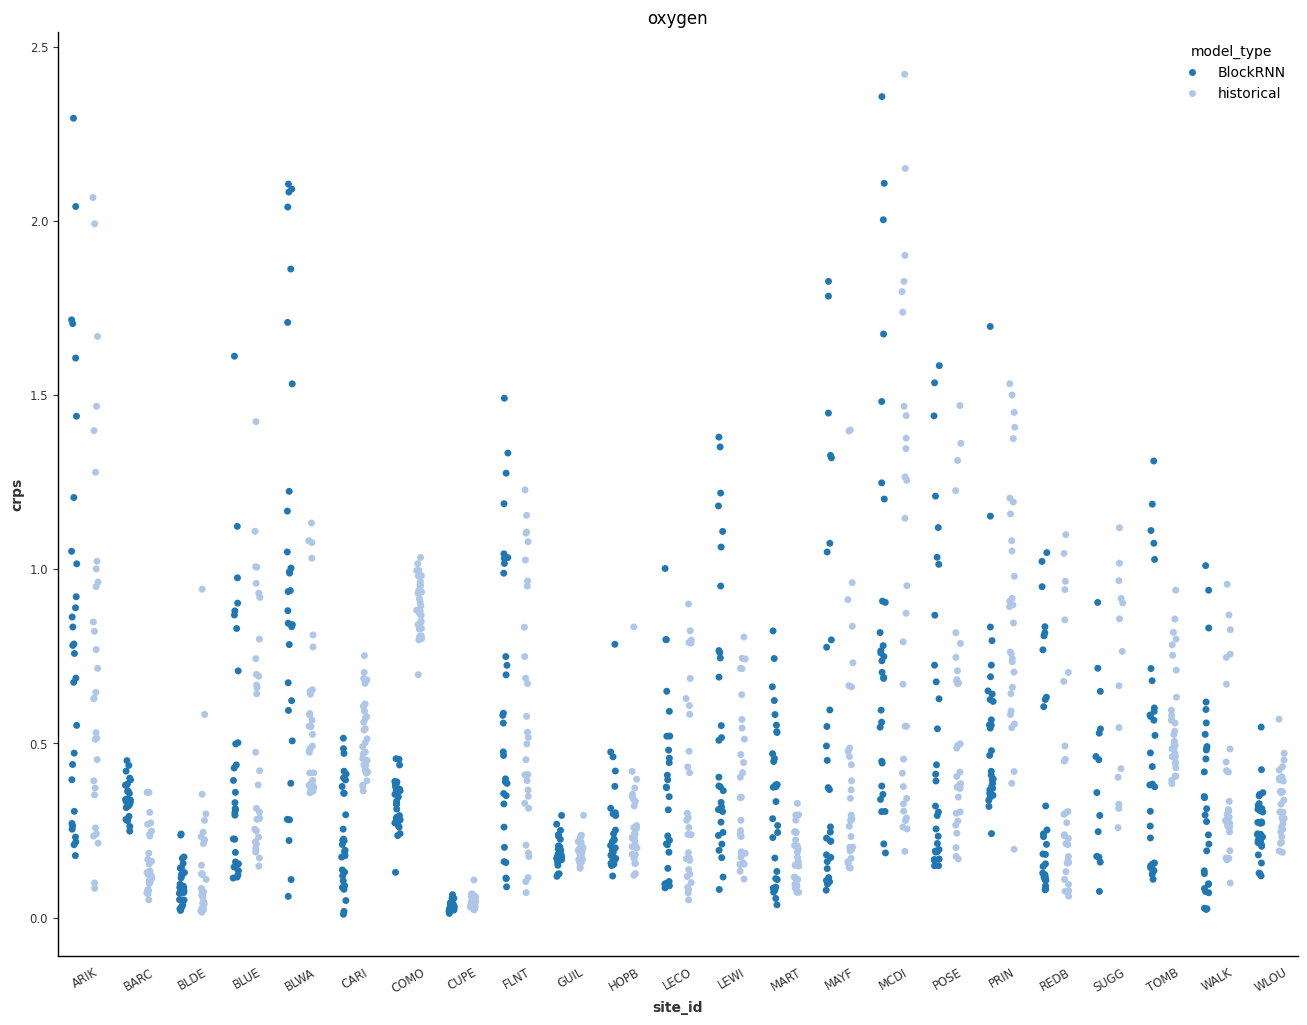

In [26]:
plot_crps_bysite("BlockRNN", targets, "oxygen", suffix="_default")

ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.


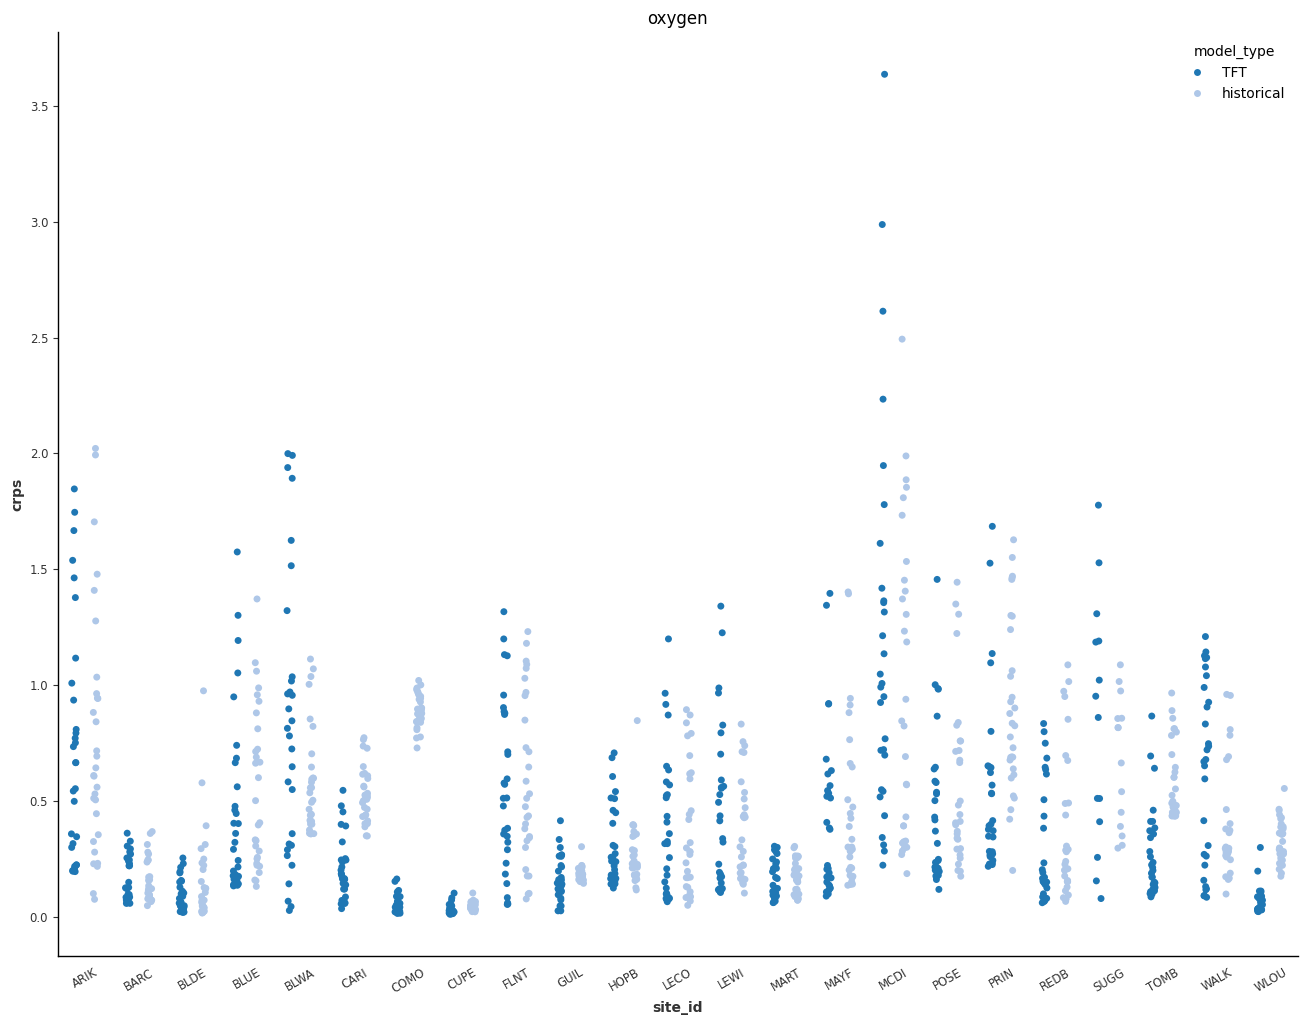

In [27]:
plot_crps_bysite("TFT", targets, "oxygen", suffix="_default")

ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.
ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.
ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with miss

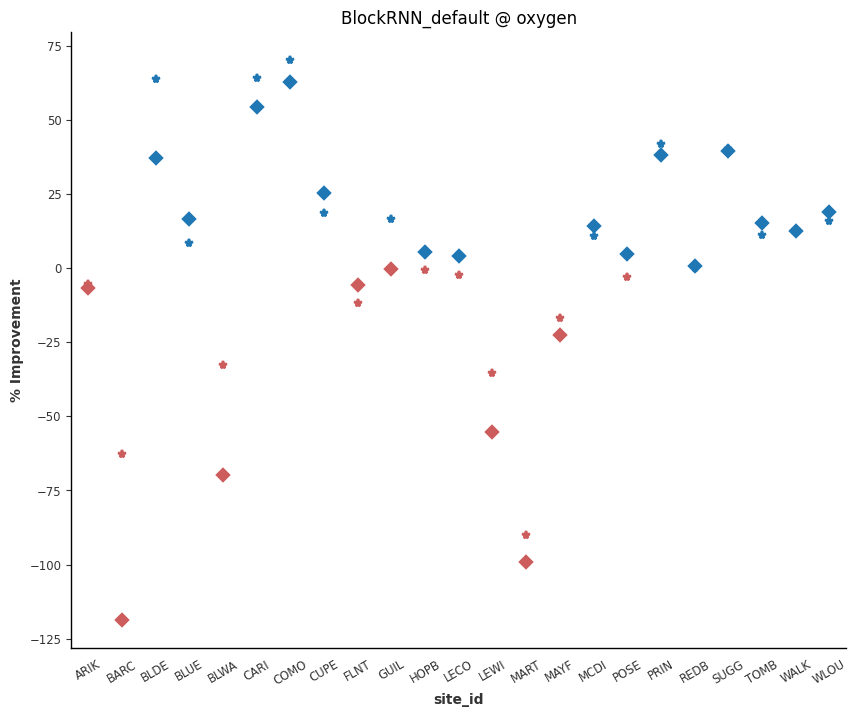

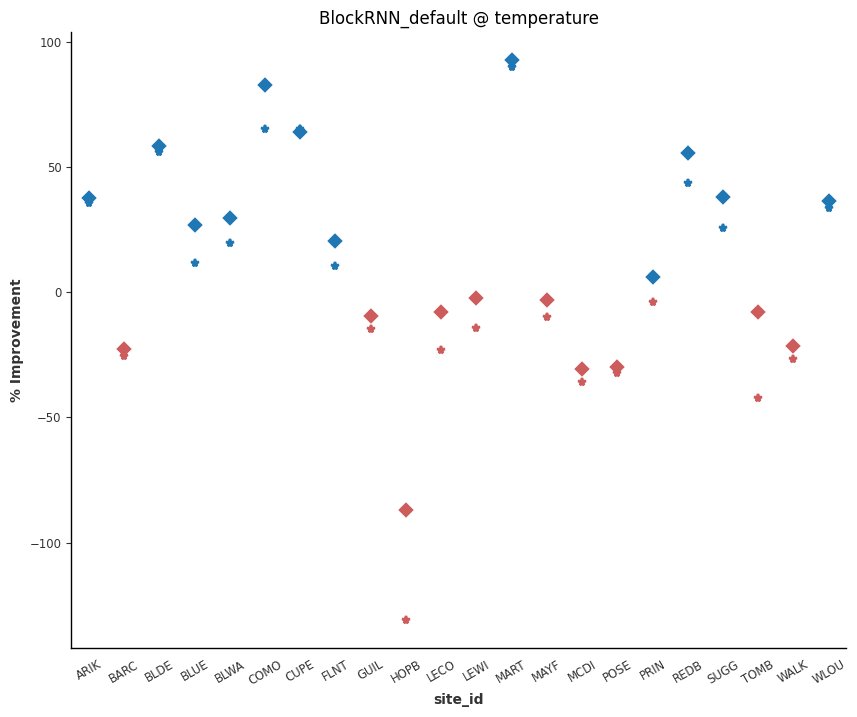

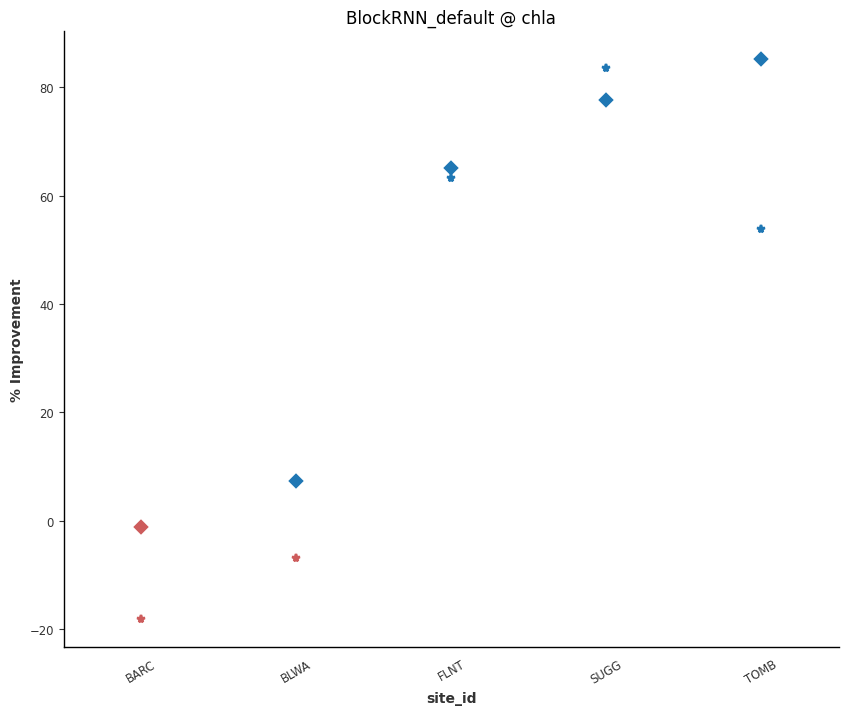

In [28]:
plot_sitewide_comparison("BlockRNN", targets, "_default")

In [31]:
def perform_counts(model, targets_df, suffix, count_dict={}):
    for target_variable in ['oxygen', 'chla', 'temperature']:
        count_dict = count_score_improvement_bysite(
            model, 
            targets_df, 
            target_variable, 
            suffix=suffix, 
            count_dict=count_dict
        )
    return count_dict

def count_across_models(model_list, suffix):
    count_dict = {}
    for model in model_list:
        count_dict = perform_counts(
            model, targets, suffix=suffix, count_dict=count_dict
        )
    return count_dict

def print_count_dict(count_dict):
    max_key_length = max(len(key) for key in count_dict)
    for key, value in count_dict.items():
        print(f'{key:{max_key_length}}: {value}')

In [34]:
model_list = [
    'TCN', 'DLinear', 'NLinear', 
    'TFT', 'RNN', 'BlockRNN', 
    'Transformer', 'NBEATS'
]
count_dict = count_across_models(model_list, suffix='_default')

ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.
ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.
ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with miss

In [35]:
print_count_dict(count_dict)

TCN_default        : {'oxygen': '15/23', 'chla': '2/5', 'temperature': '8/22'}
DLinear_default    : {'oxygen': '14/23', 'chla': '0/5', 'temperature': '9/22'}
NLinear_default    : {'oxygen': '15/23', 'chla': '1/5', 'temperature': '9/22'}
TFT_default        : {'oxygen': '14/23', 'chla': '3/5', 'temperature': '15/22'}
RNN_default        : {'oxygen': '14/23', 'chla': '2/5', 'temperature': '10/22'}
BlockRNN_default   : {'oxygen': '11/23', 'chla': '3/5', 'temperature': '11/22'}
Transformer_default: {'oxygen': '9/23', 'chla': '4/5', 'temperature': '14/22'}
NBEATS_default     : {'oxygen': '11/23', 'chla': '3/5', 'temperature': '11/22'}


## Things to explore from here

### 0) Implement early stopping and pruning

### 1) Consider forecast windows at different times of the year

### 2) Compare model performance between tuned and default hyperparameters (in my preliminary work on this, I found that tuning doesn't necessarily reduce performance variance across sites)

### 3) Add ARIMA to model comparison

### 4) Do ablation test with covariates; i.e. better understand what covariates improve model performance

### 5) Layer water body type and location to comparisons

Find global mean crps and rmse